# AIC-403 Lab 1: Getting Started

CMKL University

By Sarun Gulyanon


### Goal

Apply classification and regression techniques using the scikit-learn library, and track experiment performance with MLflow and Weights & Biases (W&B).


### Outline

In this lab, we will review the main steps in implementing machine learning models using scikit-learn library. Beyond model training, we will explore tools for logging and visualizing experiments results.

1. K-Nearest Neighbors (KNN)
2. Linear Regression
3. MLflow
4. Weights & Biases (W&B)

----

# 0. Setting Up Working Environment

Install neceesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm that classifies a data point based on the majority label of its `k` closest neighbors in the feature space.

In this lab, we will work with the [Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset), a classic dataset containing measurements of flower sepals and petals from three Iris species. We will use only the first two features (sepal length and sepal width) for visualization purposes.

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X_clf, y_clf = data.data[:,:2], data.target

Sanity Check: Display some rows using Pandas

In [3]:
# Display as a DataFrame
clf_data = pd.DataFrame(X_clf, columns=["Feature 1", "Feature 2"])
clf_data["Target"] = y_clf
clf_data

,Feature 1,Feature 2,Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


Perform a train-test split (hold-out evaluation) to separate training and testing data. Train a KNN classifier with `k=5`.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf, y_train_clf)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Use the trained model to make predictions. Evaluate model performance using accuracy, precision, recall, and F1-score, which are typical classification metrics.

In [5]:
from sklearn.metrics import classification_report

# Evaluate model
y_pred_clf = knn.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.67      0.62      0.64        13
           2       0.64      0.69      0.67        13

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



Visualize the decision boundary to see how the model separates different classes.

<Figure size 800x600 with 0 Axes>

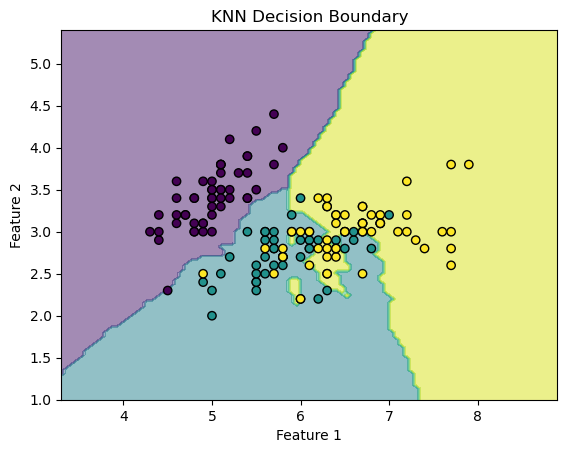

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay

# Visualize decision boundary
plt.figure(figsize=(8, 6))
display = DecisionBoundaryDisplay.from_estimator(
    knn, X_clf, response_method="predict", alpha=0.5
)
display.ax_.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, edgecolor="k")
plt.title("KNN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 2. Linear Regression

Linear Regression is a parametric, supervised learning algorithm that models the relationship between one or more input features and a continuous target variable as a linear equation.


In this lab, we will work with the [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset), a standard regression dataset used for predicting a quantitative measure of disease progression one year after baseline. We will use only the first feature (age) for visualization purposes. The feature variable has been mean centered and scaled by the standard deviation.

In [7]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X_reg, y_reg = data.data[:,0:1], data.target

Sanity Check: Display some rows using Pandas

In [8]:
# Display as a DataFrame
reg_data = pd.DataFrame(X_reg, columns=["Feature"])
reg_data["Target"] = y_reg
reg_data

,Feature,Target
0,0.038076,151.0
1,-0.001882,75.0
2,0.085299,141.0
3,-0.089063,206.0
4,0.005383,135.0
...,...,...
437,0.041708,178.0
438,-0.005515,104.0
439,0.041708,132.0
440,-0.045472,220.0


Perform a train-test split (hold-out evaluation) to separate training and testing data. Train a linear regression with default hyperparameters.

In [9]:
from sklearn.linear_model import LinearRegression

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Linear regression has a closed-form (analytical) solution for the optimal weights, which can be computed using the Moore-Penrose pseudo-inverse, $w = (X^T X)X^T y$

In [10]:
import numpy.linalg as LA
X = np.concatenate((np.ones(X_train_reg.shape), X_train_reg), axis=1)
coef = LA.inv(X.T @ X) @ X.T @ y_train_reg
print("Coefficients:", coef)

Coefficients: [153.53809365 323.57449776]


Compare to the coefficients computed by the scikit-learn library.

In [11]:
print("Coefficients:", [lin_reg.intercept_, *lin_reg.coef_])

Coefficients: [np.float64(153.53809364644917), np.float64(323.5744977567089)]


Use the trained model to make predictions. Evaluate model performance using mean squared error (MSE) and R-squared, which is a typical regression metric.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred_reg = lin_reg.predict(X_test_reg)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R-squared: {r2_score(y_test_reg, y_pred_reg):.2f}")

Mean Squared Error: 5256.09
R-squared: 0.03


Visualize the regression line over the scatter plot to see how well the model fits the data.

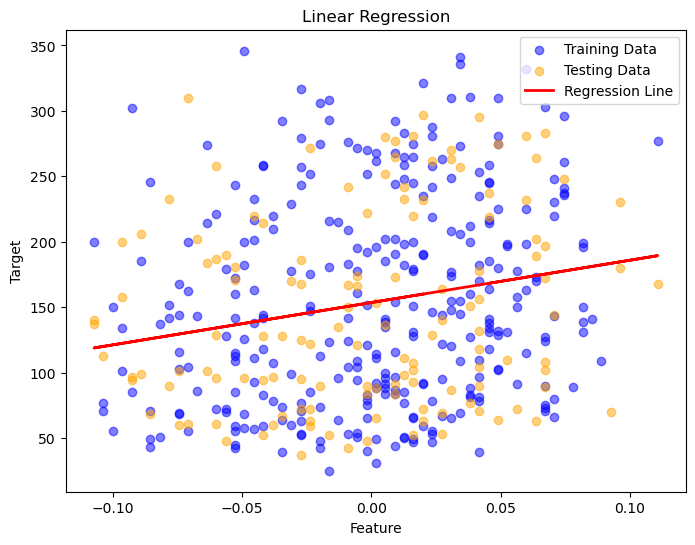

In [13]:
# Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reg, y_train_reg, c='blue', alpha=0.5, label="Training Data")
plt.scatter(X_test_reg, y_test_reg, c='orange', alpha=0.5, label="Testing Data")
plt.plot(X_test_reg, y_pred_reg, color='red', linewidth=2, label="Regression Line")
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

Plot the residuals (differences between predicted and actual values) to check for patterns and assess how well the model fits the data.

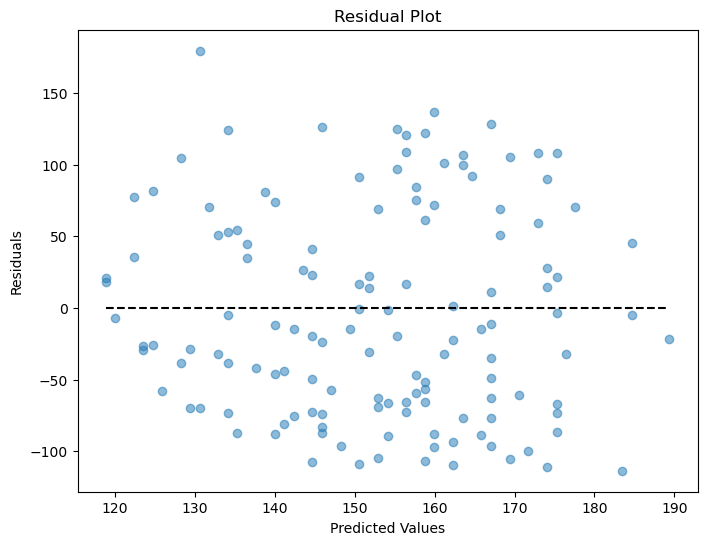

In [14]:
# Visualize residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, y_test_reg - y_pred_reg, alpha=0.5)
plt.hlines(0, min(y_pred_reg), max(y_pred_reg), colors='k', linestyles='dashed')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 3. MLflow

[MLflow](https://mlflow.org/) is an open-source platform for managing the machine learning lifecycle, including experiment tracking, model management, and deployment.

In [15]:
# !pip install mlflow

In [16]:
import mlflow
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

To track your experiments in MLflow, follow these main steps:

1. Set an Experiment. All runs logged under this name will be grouped together.

In [17]:
# Create or set experiment
experiment_name = "knn-optimization"
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///c:/Users/sguly/Documents/aic403/mlruns/522113648484882891', creation_time=1755141529368, experiment_id='522113648484882891', last_update_time=1755141529368, lifecycle_stage='active', name='knn-optimization', tags={}>

2. Start a Run. Use `with mlflow.start_run():` to start logging a specific run.
3. Log Parameters. Use `mlflow.log_param("param_name", value)` and `mlflow.log_metric("metric_name", value)` to log parameters and metrics.

In [ ]:
print(f"Starting hyperparameter optimization experiment: {experiment_name}")

for k in range(2,7):
    with mlflow.start_run(run_name=f"KNN_k={k}"):
        # Train model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_clf, y_train_clf)

        # Predict
        y_pred_clf = knn.predict(X_test_clf)

        # Calculate metrics (weighted average for multiclass)
        acc = accuracy_score(y_test_clf, y_pred_clf)
        prec, rec, f1, _ = precision_recall_fscore_support(y_test_clf, y_pred_clf, average="weighted", zero_division=0)

        # Log parameters and metrics
        mlflow.log_param("n_neighbors", k)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1-score", f1)

        # Log the model
        mlflow.sklearn.log_model(knn, name=f"KNNmodel_k={k}", input_example=X_train_clf)

        print(f"k={k} → Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, F1: {f1:.4f}")

Starting hyperparameter optimization experiment: knn-optimization
k=2 → Acc: 0.7778, Prec: 0.7958, Rec: 0.7778, F1: 0.7653
k=3 → Acc: 0.7556, Prec: 0.7558, Rec: 0.7556, F1: 0.7552
k=4 → Acc: 0.7556, Prec: 0.7633, Rec: 0.7556, F1: 0.7462
k=5 → Acc: 0.8000, Prec: 0.8005, Rec: 0.8000, F1: 0.7997
k=6 → Acc: 0.7778, Prec: 0.7778, Rec: 0.7778, F1: 0.7778


Run `mlflow ui` in terminal and open http://127.0.0.1:5000 to see results.

# 4. Weights & Biases (W&B)

[Weights & Biases (W&B)](https://wandb.ai/site/) is a cloud-based platform for experiment tracking, visualization, and collaboration in machine learning projects.

In [19]:
# !pip install wandb

To track your experiments in W&B, follow these main steps:

1. Log in. Use the command, `wandb login`, and paste your API key when prompted.
2. Initialize a Run. Start a new experiment with `wandb.init(project="project_name", name="run_name")`.
3. Log Metrics. Record model performance over time or at the end of training using `wandb.log({"metric_name": value})`.
4. Finish the Run. End the experiment with `wandb.finish()` to ensure all logs are uploaded.

In [20]:
import wandb

# Start a new wandb run to track this script.
run = wandb.init(
    # Set the wandb entity where your project will be logged (generally your team name).
    entity="sgulyano",
    # Set the wandb project where this run will be logged.
    project=experiment_name,
    # Track hyperparameters and run metadata.
    config={
        "architecture": "KNN",
        "dataset": "Iris",
    },
)

# Simulate training.
print(f"Starting hyperparameter optimization experiment: {experiment_name}")

for k in range(2,7):
    # Train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clf, y_train_clf)

    # Predict
    y_pred_clf = knn.predict(X_test_clf)

    # Calculate metrics (weighted average for multiclass)
    acc = accuracy_score(y_test_clf, y_pred_clf)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test_clf, y_pred_clf, average="weighted", zero_division=0)

    # Log parameters and metrics
    run.log({"n_neighbors": k, "accuracy": acc, "precision": prec, "recall": rec, "f1-score": f1}, step=k)

    print(f"k={k} → Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, F1: {f1:.4f}")

# Finish the run and upload any remaining data.
run.finish()

wandb: Currently logged in as: sgulyano to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Starting hyperparameter optimization experiment: knn-optimization
k=2 → Acc: 0.7778, Prec: 0.7958, Rec: 0.7778, F1: 0.7653
k=3 → Acc: 0.7556, Prec: 0.7558, Rec: 0.7556, F1: 0.7552
k=4 → Acc: 0.7556, Prec: 0.7633, Rec: 0.7556, F1: 0.7462
k=5 → Acc: 0.8000, Prec: 0.8005, Rec: 0.8000, F1: 0.7997
k=6 → Acc: 0.7778, Prec: 0.7778, Rec: 0.7778, F1: 0.7778


accuracy,▅▁▁█▅
f1-score,▃▂▁█▅
n_neighbors,▁▃▅▆█
precision,▇▁▂█▄
recall,▅▁▁█▅
accuracy,0.77778
f1-score,0.77778
n_neighbors,6
precision,0.77778
recall,0.77778


---